# Cálculo de Áreas

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import constants
from scipy import stats
from copy import deepcopy
from numpy.lib import scimath
import os
import _pickle as pk
import json

# Importación de datos



In [31]:
# Se cargan los datos

data = np.loadtxt("C:/Users/Dell/Documents/Universidades/Extra-curricular/PlasmaTEC/Langmuir Probe Stuff/plasmatec/Cálculo de errores/Datos/prueba0.txt")
data1 = []
p = 0

# Se separan los datos de cada superficie en archivos distintos

for i in range(len(data)):
    if i == 0:
        data1.append(data[i][:2])
    elif data[i][2] == data[i-1][2]:
        data1.append(data[i][:2])
    elif data[i][2] != data[i-1][2]:
        p=p+1
        np.savetxt("C:/Users/Dell/Documents/Universidades/Extra-curricular/PlasmaTEC/Langmuir Probe Stuff/plasmatec/Cálculo de errores/Datos/Curvas/"+str(p)+".txt",data1,delimiter="\t",header="R Z")
        data1 = []
        data1.append(data[i][:2])

In [32]:
# Se cuentan la cantidad de archivos que hay en la carpeta donde se almacenó
# cada superficie

_, _, files = next(os.walk("C:/Users/Dell/Documents/Universidades/Extra-curricular/PlasmaTEC/Langmuir Probe Stuff/plasmatec/Cálculo de errores/Datos/Curvas"))
file_count = len(files)

# Se toman los valores máximo y mínimo en R de cada una de las superficies
# Se almacena cada columna de cada superficie en un archivo por a parte

b = []
a = []
Rs = []
Z_each = []
for j in range(file_count):
    data2 = np.loadtxt("C:/Users/Dell/Documents/Universidades/Extra-curricular/PlasmaTEC/Langmuir Probe Stuff/plasmatec/Cálculo de errores/Datos/Curvas/"+str(j+1)+".txt")
    
    R = []
    Z = []
    for k in range(len(data2)):
        R.append(data2[k][0])
        Z.append(data2[k][1])
    
    a0 = np.amin(R)
    b0 = np.amax(R)
    a.append(a0)
    b.append(b0)
    
    Rs.append(R)
    Z_each.append(Z)

In [33]:
# Se separan los datos en función de sus valores positivos y negativos en Z
# con su R respectivo

Z_each_p = []
R_p = []
Z_each_n = []
R_n = []
for w in range(len(Z_each)):
    Z = Z_each[w]
    R = Rs[w]
    
    positive = []
    negative = []
    r_p = []
    r_n = []
    for x in range(len(Z)):
        z = Z[x]
        r = R[x]
        if z >= 0:
            positive.append(z)
            r_p.append(r)
        elif z <= 0:
            negative.append(z)
            r_n.append(r)
            
    Z_each_p.append(positive)
    R_p.append(r_p)
    Z_each_n.append(negative)
    R_n.append(r_n)
R_n[0] = R_p[0]
Z_each_n[0] = Z_each_p[0]

In [34]:
Z_fits_p = []
Z_fits_n = []
sd_all_p = []
sd_all_n = []
Area_fit = []
A_p = []
A_n = []
Poly_p = []
Poly_n = []
for s in range(len(Z_each)):
    Zp = np.array(Z_each_p[s])
    Zn = - np.array(Z_each_n[s])
    Rp = np.array(R_p[s])
    Rn = np.array(R_n[s])
    
    Fit_p = np.polyfit(Rp,Zp,len(Zp),full=True)
    Fit_n = np.polyfit(Rn,Zn,len(Zp),full=True)
    
    Ap = np.polyval(np.polyint(Fit_p[0]),b[s]) - np.polyval(np.polyint(Fit_p[0]),a[s])
    A_p.append(Ap)
    An = np.polyval(np.polyint(Fit_n[0]),b[s]) - np.polyval(np.polyint(Fit_n[0]),a[s])
    A_n.append(An)
    
    A0 = Ap + An
    Area_fit.append(A0)
    
    Eval_p = np.polyval(Fit_p[0],Rp)
    sd_all_p.append(np.sum((Eval_p - Zp)**2))
    Eval_n = np.polyval(Fit_n[0],Rn)
    sd_all_n.append(np.sum((Eval_n - Zn)**2))
    Poly_p.append(Fit_p[0])
    Poly_n.append(Fit_n[0])
    Z_fits_p.append(Eval_p)
    Z_fits_n.append(Eval_n)

In [35]:
# Se calculan las áreas
A_trapz = []
for s in range(len(Z_each)):
    Zp = np.array(Z_each_p[s])
    Zn = - np.array(Z_each_n[s])
    Rp = np.array(R_p[s])
    Rn = np.array(R_n[s])
    
    A_trapz.append(-np.trapz(Zp,Rp) + np.trapz(Zn,Rn))

In [36]:
A_trapz

[0.0,
 4.982777314099999e-05,
 9.96449715105e-05,
 0.000149445743187,
 0.00019923504317749996,
 0.00024900709847650005,
 0.0002987686349439999,
 0.0003485112401,
 0.00039824300518,
 0.00044795930043799994,
 0.0004976609452999999,
 0.00054734897432,
 0.0005970229923689999,
 0.0006466832741620001,
 0.000696330202117,
 0.0007459629612505,
 0.000795579929944,
 0.0008451867359120001,
 0.0008947782019239999,
 0.0009443610900089999,
 0.0009939197651654998,
 0.0010434792489879999,
 0.0010930217777100001,
 0.001142551283202,
 0.001192065129678,
 0.0012415682304920002,
 0.0012910591124879998,
 0.001340545266318,
 0.0013900183433260003,
 0.0014394743912000002,
 0.00148892354159,
 0.00153836317329,
 0.0015877869854600002,
 0.0016371952074900002,
 0.0016866114447899997,
 0.0017360041728500001,
 0.0017853933061,
 0.0018347603278500001,
 0.00188413049316,
 0.0019334818677500002,
 0.0019828229130499997,
 0.0020321626386299997,
 0.00208149477121,
 0.0021308163473650003,
 0.00218012980517,
 0.0022294271

# Cálculo del error del área

Se hizo como en https://en.wikipedia.org/wiki/Trapezoidal_rule

In [37]:
A_error = []
for t in range(len(A_trapz)):
    Ap = A_p[t]
    An = A_n[t]
    a0 = a[t]
    N = len(Z_each[0])-1
    dx = (b[t] - a0)/N
    Polyp = Poly_p[t]
    Polyn = Poly_n[t]
    sdp = sd_all_p[t]
    sdn = sd_all_n[t]
    
    t1 = 0
    t2 = 0
    for u in range(1,N):
        t1 = t1 + np.polyval(Polyp,(a0 + u*dx))
        t2 = t2 + np.polyval(Polyn,(a0 + u*dx))
    
    A_errorp = Ap - dx*((np.polyval(Polyp,a0) + np.polyval(Polyp,b[t]))/2 + t1)
    A_errorn = An - dx*((np.polyval(Polyn,a0) + np.polyval(Polyn,b[t]))/2 + t2)
    
    A_error.append(np.sqrt(A_errorp**2 + A_errorn**2 + sdp**2 + sdn**2))

In [38]:
A_error

[0.0,
 1.4766211674104944e-07,
 1.7346863513692635e-07,
 2.628350868539531e-07,
 3.6074751056686655e-07,
 4.780384732166441e-07,
 6.131141997572351e-07,
 7.640425977563376e-07,
 6.067995226088531e-07,
 7.186811959270532e-07,
 8.434100241507273e-07,
 9.758790744604979e-07,
 1.1188213628083237e-06,
 1.2755333942310421e-06,
 1.3502152564466808e-06,
 1.5122409629034047e-06,
 1.6689351096695988e-06,
 1.8355404100720477e-06,
 2.0239433912944665e-06,
 2.219412721779881e-06,
 2.4044759174010513e-06,
 2.6165004160079486e-06,
 2.834611672361112e-06,
 3.059486041740309e-06,
 2.3685844914873584e-06,
 2.5452281592245073e-06,
 2.7296075911452143e-06,
 2.9371916599302e-06,
 3.145713251525025e-06,
 3.3614338238686404e-06,
 3.6063664294160647e-06,
 3.837981227813776e-06,
 4.09999321481973e-06,
 4.351956270082995e-06,
 4.652876812521064e-06,
 4.944866810830143e-06,
 5.274267971280084e-06,
 5.598287617956336e-06,
 5.935071302785648e-06,
 6.289905517920128e-06,
 6.072316065181066e-06,
 6.441815913562548e-

Para obtener $\rho$

In [39]:
rho = []
for A in range(len(A_trapz)):
    A0 = A_trapz[len(A_trapz)-1]
    Ai = A_trapz[A]
    rho.append(np.sqrt(Ai/A0))

In [40]:
rho

[0.0,
 0.10203578240422755,
 0.14429273103049226,
 0.17670894509934082,
 0.20403262819484227,
 0.22809860204143123,
 0.2498528232247787,
 0.26985169756118776,
 0.28846347965075986,
 0.3059398423782053,
 0.3224657099270499,
 0.33818077418880604,
 0.35319316308562915,
 0.36758905687977156,
 0.3814383682818709,
 0.3947984072187104,
 0.40771685830017795,
 0.4202358472140524,
 0.43238882132498735,
 0.4442074132751655,
 0.4557140551071167,
 0.4669374080142283,
 0.4778935480710247,
 0.4886012918774986,
 0.49907607604065285,
 0.5093332815236216,
 0.5193855028677128,
 0.5292458989737506,
 0.538923380663412,
 0.5484268781759671,
 0.5577671826005007,
 0.5669518765968108,
 0.5759872614423007,
 0.5848802978538692,
 0.5936415375021993,
 0.6022712637365243,
 0.6107784574437546,
 0.6191650449825495,
 0.6274400677455821,
 0.6356042778773903,
 0.6436632654100762,
 0.6516223788904237,
 0.6594842405837081,
 0.6672518241006918,
 0.6749287619137957,
 0.6825168875593834,
 0.6900206244497211,
 0.6974433197871

Para obtener $\theta$

In [41]:
def place_angle(z,Rd):
    """
    Entradas: z -- float, Rd -- float
    Salidas: theta -- float
    Descrip: Esta función pasa el ángulo dado por np.arctan del dominio [-pi/2, pi/2] a [0,2pi[
    """
    theta = np.arctan(z/Rd)
    perm = [[1, 1],[1, -1],[-1, 1],[-1, -1],[0, -1],[-1, 0],[0,1],[1,0]]
    top_sign = int(np.sign(z))
    bottom_sign = int(np.sign(Rd))
    perm_i = [top_sign,bottom_sign]

    if perm_i == perm[0]:
        theta = theta

    elif perm_i == perm[1]:
        theta = np.pi + theta

    elif perm_i == perm[2]:
        theta = 2*np.pi + theta

    elif perm_i == perm[3]:
        theta = np.pi + theta

    elif perm_i == perm[4]:
        theta = np.pi

    elif perm_i == perm[5]:
        theta = 3*np.pi/2

    elif perm_i == perm[6]:
        theta = 0

    elif perm_i == perm[7]:
        theta = np.pi/2
    else:
        raise Exception("Math Error")

    return theta

R0 = Rs[0]
theta = [Z_each[0]]
for B in range(1,len(Rs)):
    Ri = np.array(Rs[B]) - np.array(R0)
    Zi = np.array(Z_each[B])
    
    thetai = []
    for C in range(len(Ri)):
        r = Ri[C]
        z = Zi[C]
        angle = place_angle(z,r)
        thetai.append(angle)
    
    theta.append(thetai)

In [42]:
theta

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0,
  0.03371937382237776,
  0.06769878897567434,
  0.10220634768234335,
  0.13746330640601528,
  0.17374000875964837,
  0.2113262304257433,
  0.25040904985517165,
  0.2913221596230442,
  0.3344390020020241,
  0.3801347232136021,
  0.4289460768516546,
  0.48127554547814605,
  0.537697365488

Ahora, se procede a generar un diccionario que incluya los valores de $\rho$, $Z$, $R$ y $\theta$ asociados al número de superficie.

In [43]:
All = {}
for D in range(len(rho)):
    All[D] = [rho[D],Z_each[D],Rs[D],theta[D]]

In [44]:
All

{0: [0.0,
  [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0],
  [0.249805,
   0.249805,
   0.249805,
   0.249805,
   0.249805,
   0.249805,
   0.249805,
   0.249805,
   0.249805,
   0.249805,
   0.249805,
   0.249805,
   0.249805,
   0.249805,

In [45]:
All_list = []
for E in range(len(rho)):
    rhoi = rho[E]
    Zi = Z_each[E]
    Ri = Rs[E]
    thetai = theta[E]
    
    for F in range(len(Ri)):
        rZRt = np.array([rhoi,Zi[F],Ri[F],thetai[F]])
        
        All_list.append(rZRt)

np.savetxt("C:/Users/Dell/Documents/Universidades/Extra-curricular/PlasmaTEC/Langmuir Probe Stuff/plasmatec/Cálculo de errores/Datos/All.txt",All_list,delimiter="\t",header="rho\tZ\tR\ttheta")

# Curvas de mejor ajuste

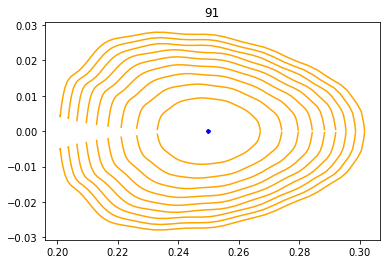

In [46]:
for ii in range(len(Z_fits_p)):
    Rfitp = R_p[ii]
    Zfitp = Z_fits_p[ii]
    Rfitn = R_n[ii]
    Zfitn = - np.array(Z_fits_n[ii])
    Z = Z_each[ii]
    R = Rs[ii]
    
    if ii == 0:
        plt.scatter(R,Z,s = 5, color = "blue")
        
    elif ii%10 == 0:
        plt.plot(Rfitp, Zfitp,color="orange")
        plt.plot(Rfitn,Zfitn,color="orange")
        plt.title(str(ii+1))
    
plt.show()

# Usando un fit con Fourier

Esto se realiza utilizando el código implementado por Johansell

In [47]:
#Se utiliza el código encontrado en https://stackoverflow.com/questions/52524919/fourier-series-fit-in-python 
#que utliza python simbólico para generar el ajuste

#@title
!pip install sympy==1.3
!pip install symfit
from symfit import parameters, variables, sin, cos, Fit


def fourier_series(x, f, n=0):
    """
    Returns a symbolic fourier series of order `n`.

    :param n: Order of the fourier series.
    :param x: Independent variable
    :param f: Frequency of the fourier series
    """
    # Make the parameter objects for all the terms
    R0, *cos_R_c = parameters(','.join(['R_c{}'.format(i) for i in range(0, n + 1)]))
    sin_R_s = parameters(','.join(['R_s{}'.format(i) for i in range(1, n + 1)]))
    # Construct the series
    series = R0 + sum(R_ci * cos(i * f * x) + R_si * sin(i * f * x)
                     for i, (R_ci, R_si) in enumerate(zip(cos_R_c, sin_R_s), start=1))
    return series, cos_R_c, sin_R_s

x, y = variables('x, y')
w, = parameters('w')
model, R_c, R_s = fourier_series(x, f=1, n=14)
model_dict = {y: model}

print(model_dict)

{y: R_c0 + R_c1*cos(x) + R_c10*cos(10*x) + R_c11*cos(11*x) + R_c12*cos(12*x) + R_c13*cos(13*x) + R_c14*cos(14*x) + R_c2*cos(2*x) + R_c3*cos(3*x) + R_c4*cos(4*x) + R_c5*cos(5*x) + R_c6*cos(6*x) + R_c7*cos(7*x) + R_c8*cos(8*x) + R_c9*cos(9*x) + R_s1*sin(x) + R_s10*sin(10*x) + R_s11*sin(11*x) + R_s12*sin(12*x) + R_s13*sin(13*x) + R_s14*sin(14*x) + R_s2*sin(2*x) + R_s3*sin(3*x) + R_s4*sin(4*x) + R_s5*sin(5*x) + R_s6*sin(6*x) + R_s7*sin(7*x) + R_s8*sin(8*x) + R_s9*sin(9*x)}


In [48]:
datos = All

def fit_poincare(datos):
    
    results = list()
    
    for F in range(len(datos)):
        rhoi = np.array(datos[F][0])
        Zi = np.array(datos[F][1])
        Ri = np.array(datos[F][2])
        thetai = np.array(datos[F][3])
        if F == 0:
            plt.scatter(Ri, Zi, marker='.', c="black")
        elif F!=0 and F%10 == 0:
            Rfit = Fit(model_dict, x=thetai, y=Ri)
            Rfit_result = Rfit.execute()
            Zfit = Fit(model_dict, x=thetai, y=Zi)
            Zfit_result = Zfit.execute()
            results.append([Zfit_result.params,Rfit_result.params])
            # plt.scatter(Ri, Zi, marker='.', s=1.8, c="black")
            plt.plot(Rfit.model(x=thetai, **Rfit_result.params).y, Zfit.model(x=thetai, **Zfit_result.params).y, color='red')
    
    plt.show()

    return results

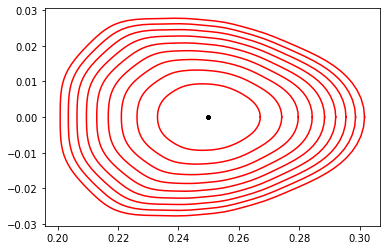

[[OrderedDict([('R_c0', 3.0357660829594124e-18),
               ('R_c1', 3.469446951953614e-18),
               ('R_c10', 3.469446951953614e-18),
               ('R_c11', 3.903127820947816e-18),
               ('R_c12', 1.734723475976807e-18),
               ('R_c13', -4.336808689942018e-18),
               ('R_c14', -3.903127820947816e-18),
               ('R_c2', -5.204170427930421e-18),
               ('R_c3', -1.2468324983583301e-18),
               ('R_c4', 3.2526065174565133e-18),
               ('R_c5', 4.336808689942018e-19),
               ('R_c6', -3.469446951953614e-18),
               ('R_c7', 0.0),
               ('R_c8', -1.734723475976807e-18),
               ('R_c9', 1.734723475976807e-18),
               ('R_s1', 0.010491318524033245),
               ('R_s10', 8.624580192433638e-06),
               ('R_s11', 6.847044731542835e-06),
               ('R_s12', 6.782982387854106e-06),
               ('R_s13', -2.2969019684509573e-06),
               ('R_s14', 4.444853281472

In [49]:
fit_poincare(datos)

# Utilizando los datos de BS-Solctra

A continuación, se procede a presentar los mismos resultados anteriores pero para diferentes datos.

In [50]:
import subprocess

def cargar_datos(file_dir, angle_cut):
    R_solctra = []
    Z_solctra = []
    main_dir = os.getcwd()
    #Se guarda el path del directorio inicial puesto que se necesitan accesar a los directorios deseados. 
    
    list_archiv = os.listdir(file_dir)
    list_archiv.sort()
    
    angle_cut = angle_cut*np.pi/180
    dphi = 0.01
    phi_up = angle_cut + dphi/2
    phi_down = angle_cut - dphi/2
    R0 = 0.2477 #Radio característico del SCR-1
    
    for Archi in list_archiv:

        data = np.loadtxt(file_dir + Archi, dtype=float, skiprows=2, delimiter='\t')
        plotcoord = list()
        #Cilindrical Toroidal Transform
        iRange, _ = data.shape
        
        R_s = []
        Z_s = []
        for i in range(iRange):
            
            if data[i,1] > phi_down and data[i,1] < phi_up:
                rtor = data[i,0]
                thetator = data[i,2]
                R = (R0+rtor*np.cos(thetator))
                z = rtor*np.sin(thetator)
                R_s.append(R)
                Z_s.append(z)


        R_solctra.append(R_s)
        Z_solctra.append(Z_s)
    
    print("done",angle_cut)

    return R_solctra, Z_solctra, list_archiv

In [51]:
R_solctra, Z_solctra, paths = cargar_datos("C:/Users/Dell/Estudiantes ITCR/Team Channel - Top Secret/Codes/resultstoroidal/",0)

done


In [52]:
def PosNeg_solctra(R_solctra,Z_solctra):
    Z_solctra_p = []
    R_solctra_p = []
    Z_solctra_n = []
    R_solctra_n = []
    for w in range(len(Z_solctra)):
        Z = Z_solctra[w]
        R = R_solctra[w]

        positive = []
        negative = []
        r_p = []
        r_n = []
        for x in range(len(Z)):
            z = Z[x]
            r = R[x]
            if z >= 0:
                positive.append(z)
                r_p.append(r)
            elif z <= 0:
                negative.append(z)
                r_n.append(r)

        Z_solctra_p.append(positive)
        R_solctra_p.append(r_p)
        Z_solctra_n.append(negative)
        R_solctra_n.append(r_n)
    return Z_solctra_p, R_solctra_p, Z_solctra_n, R_solctra_n

In [53]:
Z_solctra_p, R_solctra_p, Z_solctra_n, R_solctra_n = PosNeg_solctra(R_solctra,Z_solctra)

In [54]:
def Area_solctra_fit(Z_solctra_p, R_solctra_p, Z_solctra_n, R_solctra_n):
    Z_fit_solctra_p = []
    Z_fit_solctra_n = []
    sd_solctra_p = []
    sd_solctra_n = []
    A_solctra_fit = []
    A_solctra_p_fit = []
    A_solctra_n_fit = []
    Poly_solctra_p = []
    Poly_solctra_n = []
    a_p_solctra = []
    a_n_solctra = []
    b_p_solctra = []
    b_n_solctra = []

    for s in range(len(Z_solctra_n)):
        Zp = np.array(Z_solctra_p[s])
        Zn = - np.array(Z_solctra_n[s])
        Rp = np.array(R_solctra_p[s])
        Rn = np.array(R_solctra_n[s])

        if len(Zn)>0:
            a0_n = np.amin(Rn)
            b0_n = np.amax(Rn)

            b_n_solctra.append(b0_n)
            a_n_solctra.append(a0_n)

            Fit_n = np.polyfit(Rn,Zn,50,full=True)
            An = np.polyval(np.polyint(Fit_n[0]),b0_n) - np.polyval(np.polyint(Fit_n[0]),a0_n)
            A_solctra_n_fit.append(An)
            Eval_n = np.polyval(Fit_n[0],Rn)
            sd_solctra_n.append(np.sum((Eval_n - Zn)**2))
            Poly_solctra_n.append(Fit_n[0])
            Z_fit_solctra_n.append(Eval_n)
        else:
            An = 0
            A_solctra_n_fit.append(0.0)
            sd_solctra_n.append(0.0)
            Poly_solctra_n.append(np.array(0.0))
            Z_fit_solctra_n.append(np.array(0.0))

            b_n_solctra.append(0.0)
            a_n_solctra.append(0.0)

        if len(Zp)>0:
            a0_p = np.amin(Rp)
            b0_p = np.amax(Rp)

            b_p_solctra.append(b0_p)
            a_p_solctra.append(a0_p)

            Fit_p = np.polyfit(Rp,Zp,50,full=True)
            Ap = np.polyval(np.polyint(Fit_p[0]),b0_p) - np.polyval(np.polyint(Fit_p[0]),a0_p)
            A_solctra_p_fit.append(Ap)    
            Eval_p = np.polyval(Fit_p[0],Rp)
            sd_solctra_p.append(np.sum((Eval_p - Zp)**2))
            Poly_solctra_p.append(Fit_p[0])
            Z_fit_solctra_p.append(Eval_p)
        else:
            Ap = 0
            A_solctra_p_fit.append(0.0)
            sd_solctra_p.append(0.0)
            Poly_solctra_p.append(np.array(0.0))
            Z_fit_solctra_p.append(np.array(0.0))

            b_p_solctra.append(0.0)
            a_p_solctra.append(0.0)


        A0 = Ap + An
        if A0<0.01 or A0 == 0:
            A_solctra_fit.append(A0)
        elif A0<0 or A0>0.01:
            A_solctra_fit.append(0.0)
        
    return A_solctra_fit, Poly_solctra_p, Poly_solctra_n, a_p_solctra, a_n_solctra, b_p_solctra, b_n_solctra, A_solctra_p_fit, A_solctra_n_fit, Z_fit_solctra_p, Z_fit_solctra_n, sd_solctra_p, sd_solctra_n

In [55]:
A_solctra_fit, Poly_solctra_p, Poly_solctra_n, a_p_solctra, a_n_solctra, b_p_solctra, b_n_solctra, A_solctra_p_fit, A_solctra_n_fit, Z_fit_solctra_p, Z_fit_solctra_n, sd_solctra_p, sd_solctra_n = Area_solctra_fit(Z_solctra_p, R_solctra_p, Z_solctra_n, R_solctra_n)

In [56]:
A_solctra_fit

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.004537483036983758,
 0.004190071951597929,
 0.0032702476892154664,
 0.0025710885965963826,
 0.0023351690324489027,
 0.002100441633956507,
 0.0007876211311668158,
 0.0006449951615650207,
 0.0004190963081782684,
 0.00032219686545431614,
 0.00023802905343472958,
 0.00010806427962961607,
 8.364240784430876e-06,
 0.00047247035399777815,
 0.0009848612826317549,
 0.0013079748314339668,
 0.001676681509707123,
 0.0018786794098559767,
 0.002093913411954418,
 0.0025794562170631252,
 0.0031596260859032554,
 0.005348163642338477,
 0.0,
 0.0,
 0.0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0.0,
 0.0]

In [57]:
# Se calculan las áreas
#A_solctra_n = []
#for s in range(len(Z_solctra_n)):
    #Zn = - np.array(Z_solctra_n[s])
    #Rn = np.array(R_solctra_n[s])

    #A_solctra_n.append(np.trapz(Zn,Rn))

#A_solctra_p = []
#for s in range(len(Z_solctra_p)):
    #Zp = - np.array(Z_solctra_p[s])
    #Rp = np.array(R_solctra_p[s])

    #A_solctra_p.append(np.trapz(Zp,Rp))

#A_solctra = []
#for s in range(len(A_solctra_p)):
    #Ap = A_solctra_p[s] 
    #An = A_solctra_n[s] 
    #if Ap < 0:
        #Ap = -Ap
    #if An < 0:
        #An = - An

    #A_solctra.append(Ap + An)

In [58]:
#A_solctra

In [59]:
rho_solctra = []
for A in range(len(A_solctra_fit)):
    A0 = max(A_solctra_fit)
    Ai = A_solctra_fit[A]
    rho_solctra.append(np.sqrt(Ai/A0))

In [60]:
rho_solctra

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9210965668782142,
 0.8851327229541038,
 0.7819661977203195,
 0.6933558393026568,
 0.6607798905954216,
 0.6266902894974673,
 0.3837570226588967,
 0.3472768909470306,
 0.27993330649039166,
 0.24544732982961728,
 0.2109660838371184,
 0.14214734018901753,
 0.03954676103380305,
 0.29722472774694475,
 0.4291263558874282,
 0.49453536026474,
 0.5599160849832627,
 0.5926850793391718,
 0.6257156475256189,
 0.6944831877998083,
 0.7686267621537898,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [61]:
def place_angle(z,Rd):
    """
    Entradas: z -- float, Rd -- float
    Salidas: theta -- float
    Descrip: Esta función pasa el ángulo dado por np.arctan del dominio [-pi/2, pi/2] a [0,2pi[
    """
    theta = np.arctan(z/Rd)
    perm = [[1, 1],[1, -1],[-1, 1],[-1, -1],[0, -1],[-1, 0],[0,1],[1,0]]
    top_sign = int(np.sign(z))
    bottom_sign = int(np.sign(Rd))
    perm_i = [top_sign,bottom_sign]

    if perm_i == perm[0]:
        theta = theta

    elif perm_i == perm[1]:
        theta = np.pi + theta

    elif perm_i == perm[2]:
        theta = 2*np.pi + theta

    elif perm_i == perm[3]:
        theta = np.pi + theta

    elif perm_i == perm[4]:
        theta = np.pi

    elif perm_i == perm[5]:
        theta = 3*np.pi/2

    elif perm_i == perm[6]:
        theta = 0

    elif perm_i == perm[7]:
        theta = np.pi/2
    else:
        raise Exception("Math Error")

    return theta

R0 = 0.2477
theta_solctra = []
for B in range(len(Z_solctra)):
    Ri = np.array(R_solctra[B]) - R0
    Zi = np.array(Z_solctra[B])
    
    thetai = []
    for C in range(len(Ri)):
        r = Ri[C]
        z = Zi[C]
        angle = place_angle(z,r)
        thetai.append(angle)
    
    theta_solctra.append(thetai)

In [62]:
theta_solctra

[[2.518523],
 [2.4928749999999997],
 [2.3134549999999994],
 [2.242209],
 [2.204433],
 [2.163687],
 [2.077233,
  6.237591,
  6.235554,
  4.076564,
  3.090151,
  1.9695950000000002,
  1.9721889999999995,
  6.198417],
 [3.13785,
  1.9319319999999995,
  6.121059,
  3.8576609999999993,
  2.912573,
  1.1234030000000004,
  5.759252,
  3.575709,
  3.573434,
  2.664166,
  0.45008139999999985,
  5.036514,
  3.333063,
  2.373734,
  0.1098925,
  0.10768049999999997,
  4.241837,
  3.100123,
  1.8065799999999996,
  6.068376,
  6.066157,
  3.804178,
  2.87067,
  0.9675387000000002,
  0.9685066999999998,
  5.650051999999999,
  3.520236,
  2.607451,
  0.36423620000000023,
  0.36225029999999986,
  4.852326999999999,
  4.8553939999999995,
  3.2849,
  2.281575,
  0.031062200000000005,
  0.028844009999999996,
  4.096562,
  3.037252,
  1.5934340000000002,
  5.983542,
  3.726539,
  2.80692,
  0.7516442000000002,
  5.453686,
  3.448544,
  2.5257799999999997,
  0.26263119999999995,
  4.607885999999999,
  3.215

In [63]:
All_solctra = {}
for D in range(len(rho_solctra)):
    All_solctra[D+1] = [rho_solctra[D],Z_solctra[D],R_solctra[D],theta_solctra[D]]

In [64]:
All_solctra

{1: [0.0, [0.04194595798124645], [0.18932443481201738], [2.518523]],
 2: [0.0, [0.041387656348079796], [0.1931120448528675], [2.4928749999999997]],
 3: [0.0, [0.03739901449564237], [0.21336857592658978], [2.3134549999999994]],
 4: [0.0, [0.035573599891365174], [0.21943477872060502], [2.242209]],
 5: [0.0, [0.03462923654519993], [0.22225791649590212], [2.204433]],
 6: [0.0, [0.03358345198328689], [0.22507313741016743], [2.163687]],
 7: [0.0,
  [0.031470670982835416,
   -0.0027777796549629573,
   -0.0029016067975646377,
   -0.03156346467222117,
   0.0027730697182549576,
   0.032045837240612704,
   0.03209404530646344,
   -0.005241822145901423],
  [0.23024354063462407,
   0.30858160355798847,
   0.3085719832698289,
   0.22440381249184652,
   0.19384047137883031,
   0.23419659342398888,
   0.23407813800500196,
   0.30938886667267956],
  [2.077233,
   6.237591,
   6.235554,
   4.076564,
   3.090151,
   1.9695950000000002,
   1.9721889999999995,
   6.198417]],
 8: [0.9210965668782142,
  [0.0

In [65]:
All_list_solctra = []
for E in range(len(rho_solctra)):
    rhoi = rho_solctra[E]
    Zi = Z_solctra[E]
    Ri = R_solctra[E]
    thetai = theta_solctra[E]
    
    for F in range(len(Ri)):
        rZRt = np.array([rhoi,Zi[F],Ri[F],thetai[F]])
        
        All_list_solctra.append(rZRt)

np.savetxt("C:/Users/Dell/Documents/Universidades/Extra-curricular/PlasmaTEC/Langmuir Probe Stuff/plasmatec/Cálculo de errores/Datos/All_solctra.txt",All_list_solctra,delimiter="\t",header="rho\tZ\tR\ttheta")

In [66]:
datos_solctra = All_solctra

def fit_poincare_solctra(datos_solctra):
    
    results = list()
    
    for F in range(len(datos_solctra)):
        
        if (F+1)%2 == 0 and len(datos_solctra[F][1])>1:
            
            rhoi = np.array(datos_solctra[F][0])
            Zi = np.array(datos_solctra[F][1])
            Ri = np.array(datos_solctra[F][2])
            thetai = np.array(datos_solctra[F][3])
        
        
            # plt.scatter(Ri, Zi, marker='.', c="black")
            Rfit = Fit(model_dict, x=thetai, y=Ri)
            Rfit_result = Rfit.execute()
            Zfit = Fit(model_dict, x=thetai, y=Zi)
            Zfit_result = Zfit.execute()
            results.append([Zfit_result.params,Rfit_result.params])
            plt.scatter(Rfit.model(x=thetai, **Rfit_result.params).y, Zfit.model(x=thetai, **Zfit_result.params).y, color='red', ls=':',marker='.', s=1.5)
            plt.scatter(R0,0)
            
            print(F)
            
    plt.show()

    return results

7
9
11
13
15
17
19
21
23
25
27
29


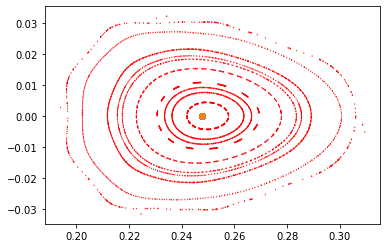

[[OrderedDict([('R_c0', 0.128814985937912),
               ('R_c1', 0.16237441488597454),
               ('R_c10', -0.0563746120710403),
               ('R_c11', -0.08983904698219995),
               ('R_c12', -0.2084875637568618),
               ('R_c13', -0.21241332175855004),
               ('R_c14', -0.3277379724498017),
               ('R_c2', 0.15636570850570586),
               ('R_c3', 0.12475819699281503),
               ('R_c4', 0.11644357503604223),
               ('R_c5', 0.13592061621752943),
               ('R_c6', 0.06375895672498076),
               ('R_c7', 0.06069099363219283),
               ('R_c8', 0.04560615090386584),
               ('R_c9', -0.026399017789607),
               ('R_s1', 0.8296915799026581),
               ('R_s10', -0.00782492016184872),
               ('R_s11', -0.029396454502003275),
               ('R_s12', -0.2931568193050595),
               ('R_s13', -0.3374305097582714),
               ('R_s14', -0.36821824149316956),
               ('R_s2'

In [67]:
fit_poincare_solctra(datos_solctra)

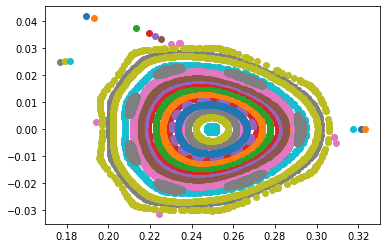

In [68]:
for m in range(len(Z_solctra)):
    plt.scatter(R_solctra[m],Z_solctra[m])
plt.show()

# Cálculo del volumen del plasma

Para esto se usarán los datos ideales y luego los del BS-SOLCTRA para poder comparar si es correcto asumir la idealidad.

In [69]:
def SuperficieDeContorno(Poly_p,Poly_n,A,a_p,a_n,b_p,b_n):
    
    centroidex = []
    
    for a in range(len(A)):
        if A[a]>0:
            area = A[a]
            p1 = Poly_p[a]
            p2 = Poly_n[a]
            b0_p = b_p[a]
            b0_n = b_n[a]
            a0_p = a_p[a]
            a0_n = a_n[a]
            
            x = np.poly1d([1, 0])
            m = np.polymul(x, p1)
            n = np.polymul(x, p2)
            
            mint = np.polyval(np.polyint(m), b0_p) - np.polyval(np.polyint(m), a0_p)
            nint = np.polyval(np.polyint(n), b0_n) - np.polyval(np.polyint(n), a0_n)
                       
            centroidex.append((mint+nint)/area)
        else:
            centroidex.append(0.2477)
            
    return centroidex, A

In [70]:
centroide_solctra, _ = SuperficieDeContorno(Poly_solctra_p,Poly_solctra_n,A_solctra_fit,a_p_solctra,a_n_solctra,b_p_solctra,b_n_solctra)

In [71]:
centroide_solctra

[0.2477,
 0.2477,
 0.2477,
 0.2477,
 0.2477,
 0.2477,
 0.2477,
 0.24773870890628005,
 0.24786870414037457,
 0.24814986717822046,
 0.24839307038894662,
 0.24849364714511404,
 0.24860110285521292,
 0.2492724202951129,
 0.2492999926337427,
 0.24948113857604348,
 0.2495374121547161,
 0.2495886414339541,
 0.24966076143287866,
 0.24972894815246538,
 0.2494493082717306,
 0.2491638433206137,
 0.24898692717781112,
 0.2488000862362585,
 0.24870446828010992,
 0.24860107502097709,
 0.248386558630632,
 0.25063904802033177,
 0.24759714923778908,
 0.2477,
 0.2477,
 0.2477,
 0.2477,
 0.2477,
 0.2477,
 0.2477,
 0.2477,
 0.2477,
 0.2477,
 0.2477]

In [76]:
def CentroArea(file_dir):
    angulo = 0
    Vol = []
    Areas = []
    Centros = []
    while angulo <= 360:
        R, Z, _ = cargar_datos(file_dir, angulo)
        Z_p, R_p, Z_n, R_n = PosNeg_solctra(R,Z)
        A, Poly_p, Poly_n, a_p, a_n, b_p, b_n, _, _, _, _, _, _ = Area_solctra_fit(Z_p, R_p, Z_n, R_n)
        C, _ = SuperficieDeContorno(Poly_p,Poly_n,A,a_p,a_n,b_p,b_n)
        Centros.append(C)
        Areas.append(A)
        angulo = angulo + 1
    
    return Areas, Centros

In [77]:
Areas_solctra, Centroides_solctra = CentroArea("C:/Users/Dell/Estudiantes ITCR/Team Channel - Top Secret/Codes/resultstoroidal/")

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [78]:
for i in range(len(Areas_solctra)):
    A = Areas_solctra[i]
    
    for j in range(len(A)):
        if A[j]<0:
            Areas_solctra[i][j] = 0.0
        
        else:
            pass

In [80]:
AreasCentros_dict = {}
for V in range(len(Areas_solctra)):
    AreasCentros_dict[V] = [Areas_solctra[V],Centroides_solctra[V]]

In [81]:
with open("C:/Users/Dell/Documents/Universidades/Extra-curricular/PlasmaTEC/Langmuir Probe Stuff/plasmatec/Cálculo de errores/Datos/AreasCentros_solctra.txt", 'w') as file:
     file.write(json.dumps(AreasCentros_dict))

In [82]:
def Volumen(Areas,Centroides):
    Vol = []
    for P in range(len(Areas[0])):
        vol = 0
        for Q in range(len(Areas)):
            area = Areas[Q][P]
            centroide = Centroides[Q][P]
            
            vol = (np.pi/180)*centroide*area + vol
        
        if vol>=0:
            Vol.append(vol)
        else:
            Vol.append(0.0)
        
    return Vol

In [83]:
Volumenes = Volumen(Areas_solctra, Centroides_solctra)

In [84]:
Vol_dict = {}
for V in range(len(paths)):
    Vol_dict[paths[V]] = Volumenes[V]

In [85]:
Vol_dict

{'torpath0013.txt': 4.4285904195628575e-05,
 'torpath0014.txt': 5.204050599713401e-05,
 'torpath0020.txt': 0.0017461232508297106,
 'torpath0022.txt': 0.0021395061062215045,
 'torpath0023.txt': 0.00201663886563916,
 'torpath0024.txt': 0.0020067463912339673,
 'torpath0026.txt': 0.0004580179529939803,
 'torpath0029.txt': 0.007258021094609669,
 'torpath0030.txt': 0.006700539200089407,
 'torpath0033.txt': 0.00524792122597442,
 'torpath0035.txt': 0.004093526255538969,
 'torpath0036.txt': 0.0037239757363076577,
 'torpath0037.txt': 0.0033555850078380535,
 'torpath0044.txt': 0.0012616970911467418,
 'torpath0045.txt': 0.0009886170420011996,
 'torpath0047.txt': 0.0006712079407172802,
 'torpath0048.txt': 0.0005159654754467796,
 'torpath0049.txt': 0.00038144695897748896,
 'torpath0051.txt': 0.00017366769144825,
 'torpath0054.txt': 1.3422649273390126e-05,
 'torpath0064.txt': 0.0007562920003346022,
 'torpath0068.txt': 0.0015758971459545281,
 'torpath0070.txt': 0.0020939588357901553,
 'torpath0072.txt

In [86]:
with open("C:/Users/Dell/Documents/Universidades/Extra-curricular/PlasmaTEC/Langmuir Probe Stuff/plasmatec/Cálculo de errores/Datos/Volumenes_solctra.txt", 'w') as file:
     file.write(json.dumps(Vol_dict))

In [87]:
Coord_dict = {}
for l in range(len(R_solctra)):
    Coord_dict[paths[l]] = [R_solctra[l],Z_solctra[l]]

In [88]:
Coord_dict

{'torpath0013.txt': [[0.18932443481201738], [0.04194595798124645]],
 'torpath0014.txt': [[0.1931120448528675], [0.041387656348079796]],
 'torpath0020.txt': [[0.21336857592658978], [0.03739901449564237]],
 'torpath0022.txt': [[0.21943477872060502], [0.035573599891365174]],
 'torpath0023.txt': [[0.22225791649590212], [0.03462923654519993]],
 'torpath0024.txt': [[0.22507313741016743], [0.03358345198328689]],
 'torpath0026.txt': [[0.23024354063462407,
   0.30858160355798847,
   0.3085719832698289,
   0.22440381249184652,
   0.19384047137883031,
   0.23419659342398888,
   0.23407813800500196,
   0.30938886667267956],
  [0.031470670982835416,
   -0.0027777796549629573,
   -0.0029016067975646377,
   -0.03156346467222117,
   0.0027730697182549576,
   0.032045837240612704,
   0.03209404530646344,
   -0.005241822145901423]],
 'torpath0029.txt': [[0.20033312174666518,
   0.23706978933336825,
   0.2992839741132501,
   0.21775395677298698,
   0.20126953928137886,
   0.26014808371720893,
   0.281438

In [102]:
with open("C:/Users/Dell/Documents/Universidades/Extra-curricular/PlasmaTEC/Langmuir Probe Stuff/plasmatec/Cálculo de errores/Datos/Coordenadas_solctra.txt", 'w') as file:
     file.write(json.dumps(Coord_dict))

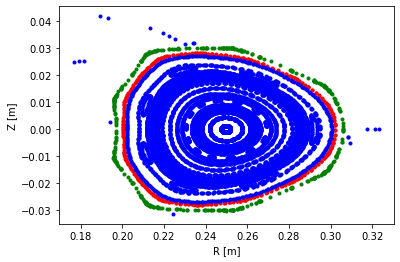

In [89]:
for m in Coord_dict.keys():
    if m == "torpath0029.txt":
        plt.scatter(Coord_dict[m][0],Coord_dict[m][1], color="red",marker=".")
    elif m == "torpath0085.txt":
        plt.scatter(Coord_dict[m][0],Coord_dict[m][1], color="green",marker=".")
    else:
        plt.scatter(Coord_dict[m][0],Coord_dict[m][1], color="blue",marker=".")
plt.xlabel("R [m]")
plt.ylabel("Z [m]")
plt.show()

In [97]:
Areas_avg = []
for p in range(len(AreasCentros_dict[0][0])):
    
    area_sum = 0
    for q in AreasCentros_dict.keys():
        
        area_sum = AreasCentros_dict[q][0][p] + area_sum
        
    area_avg = area_sum/len(AreasCentros_dict)
    
    Areas_avg.append(area_avg)

In [100]:
Areas_avg_dict = {}
for V in range(len(paths)):
    Areas_avg_dict[paths[V]] = Areas_avg[V]

In [101]:
Areas_avg_dict

{'torpath0013.txt': 3.9684298161744556e-05,
 'torpath0014.txt': 4.5883614339732176e-05,
 'torpath0020.txt': 0.0012048946707936493,
 'torpath0022.txt': 0.0014192758359474371,
 'torpath0023.txt': 0.0013353804115555968,
 'torpath0024.txt': 0.001314131039525077,
 'torpath0026.txt': 0.00030749816657274216,
 'torpath0029.txt': 0.004640765315691888,
 'torpath0030.txt': 0.004281299170514864,
 'torpath0033.txt': 0.003349081581618621,
 'torpath0035.txt': 0.002608649554990438,
 'torpath0036.txt': 0.0023717743208642597,
 'torpath0037.txt': 0.002136113926385927,
 'torpath0044.txt': 0.0008009081433580839,
 'torpath0045.txt': 0.0006282209370508308,
 'torpath0047.txt': 0.00042572738995729707,
 'torpath0048.txt': 0.0003271881552673045,
 'torpath0049.txt': 0.0002418404774289229,
 'torpath0051.txt': 0.00011007454097775446,
 'torpath0054.txt': 8.505227011656767e-06,
 'torpath0064.txt': 0.0004797365120469929,
 'torpath0068.txt': 0.001000778052562017,
 'torpath0070.txt': 0.0013306555554882832,
 'torpath0072

In [103]:
with open("C:/Users/Dell/Documents/Universidades/Extra-curricular/PlasmaTEC/Langmuir Probe Stuff/plasmatec/Cálculo de errores/Datos/Areas_avg_solctra.txt", 'w') as file:
     file.write(json.dumps(Areas_avg_dict))